# Project 2 Starter

**Here are some tips for submitting your project. You can use the points as partial check list before submission.**

- **Give your notebook a clear and descriptive title.** 
- **Explain your work in Markdown cells.** This will make your notebook easier to read and understand. You can use different colors of font to highlight important points.
- **Remove any unnecessary code or text.** For example, you should not include the template for training and scoring in your final submission.
- **Package your submission in a single file.** I will deduct points for multiple files or incorrect folder structure.
- **Name your notebooks correctly.** Include your name and Net-ID in the file name.
- **Train your TE/WOE encoders on the training set only.** You can train them on the full dataset for your final model.
- **Test your scoring function.** Most students scoring functions in the past din't work, so make sure to test yours before submitting your project.
- **Avoid common mistakes in your scoring function.** For example, your scoring function should not:
  - drop records, expect the target to be passed - check that scoring function returns same number of records as in the validation dataset provided for testing
  - fit TE/WOE/Scalers
  - return anything other than a Pandas DF.
- **Make sure you have the required number of engineered features.** 
- **Don't create features and then not use them in the model**, if there is a reason not to use the feature in the model, explain.
- **Don't include models in your notebook that you didn't train.** This is considered cheating and will result in a grade of zero for the project.
- **Consistently display model performance metrics.** Use AUC for all models and iterations, and don't switch between metrics. For sure don't use accuracy, it is misleading metric for the imbalanced datasets. 
- **Discuss your model results in a Markdown cell.** Don't just print the results; explain what they mean.
- **Include a conclusion section in your notebook.** This is your chance to summarize your findings and discuss the implications of your work.
- **Treat your notebook like a project report that will be read by your manager who can't read Python code.** Make sure your notebook is clear, concise, and easy to understand.
- **Display a preview of your dataset that you used for training.** This will help me understand what features you used in your model.
- **Use the libraries versions specified on eLearning.** For example, you should use H2O 3.44.0.3 
- **Use Python 3.10.13.** If you use another version and your code doesn't work on 3.10.13, it will be considered a bug in your code.
- **When running H2O and want to suppress long prints (for example model summary), include ";" at the end of the command.**
- **Don't include the dataset with your deliverables.** 

## Project Requirements Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model

## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Metric to report and optimize for **AUC**
    - Confusion matrix - threshold is calculated to optimize  F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Explain what are the most important features and how they impact model predictions
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)
    - Using residuals analysis identify and report common patterns in the errors made by the model
        

## Model Training and Tuning

Pick a single model to train and tune from the below two options:
- GBM (H2O)
- XgBoost


First, split the dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


### Feature engineering

You should train/fit categorical features encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.  
Your final model should have at least **10** new engineered features.   
One-hot-encoding, target encoding and WoE **are not included in the** **10** features to create.    

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. List of important features identified by DriverlessAI AutoML tool

### Model performance in H2O Driverless AI (performance to aim for)

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained with additional feature engineering. 
AUC on hold-out: 0.855

Top features:
- CVTE:Bank:BankState:FranchiseCode:SBA_Appv.0
- CVTE:Bank:BankState:NAICS:UrbanRural.0
- WoE:Bank:BankState:NAICS.0


CVTE: cross-validated target encoding
WoE : weight of evidence 


**Note**: 
- You don't have to perform feature engineering using H2O-3 even if you decided to use H2O-3 GBM for model training.
- It is OK to perform feature engineering using any technique, as long as you can replicate it correctly in the Scoring function.
- To evaluate your feature engineering effort, use **AUC** metric and train model with the same hyper-parameters.
- Only after you are done with feature engineering, move to the next step.

### Model Tuning

- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description
- **Use AUC for all models and iterations, and don't switch between metrics.** Under any conditions, don't use accuracy metric, it is misleading metric for the imbalanced datasets.

**Select final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 
- Report final AUC metric and confusion matrix on the Test dataset using the threshold calculated above.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.

### Scoring function

The Project will be graded based on the completeness and performance of your final model against the hold-out dataset.
The hold-out dataset provide in the eLearning. As part of your deliverables, you will need to submit a scoring function. 


The scoring function will perform the following:
- Accept dataset in the same format as provided with the project, minus "MIS_Status" column
- Load trained model and any encoders/scalers that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record
    - **index** : Record ID
    - **label** : Record label as determined by final model (0 or 1) you need to assign the label based on maximum F1 threshold
    - **probability_0**	: probability of class 0
    - **probability_1** : probability of class 1
    
See full example of scoring function in Project 1 description.
Test your scoring function on the hold-out dataset provided in the eLearning, and validate that it returns the same number of records as in the hold-out dataset.


### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format.
    - Jupyter notebook with scoring function. `ipynb` format.
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

### Dataset description

Dataset is similar (in regard to features) to the dataset provided for Project 1. Use data provided under Project 2 requirements, don't use data from Project 1.

### Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings to floats/integers as needed

Any additional clean-up as you find fit.

In [35]:
import pandas as pd
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 5000)

import warnings
warnings.filterwarnings('ignore')

import pickle

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [36]:
df = pd.read_csv("../SBA_loans_project_2.csv")
#df.drop(columns="index",inplace=True)

In [37]:
df

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,FORT LEE,NJ,7024,BNB HANA BANK NATL ASSOC,NJ,425120,2,1.0,0,2,1,1,Y,N,10000.0,0.0,10000.0,5000.0,0
1,1,WESTWEGO,LA,70094,JEDCO DEVELOPMENT CORPORATION,LA,812331,62,1.0,6,0,1,1,0,N,353000.0,0.0,353000.0,353000.0,0
2,2,DENVER,CO,80209,WELLS FARGO BANK NATL ASSOC,SD,541611,4,1.0,1,4,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0
3,3,WRANGELL,AK,99929,FIRST BANK,AK,446110,3,2.0,0,0,1,0,N,Y,75000.0,0.0,75000.0,67500.0,0
4,4,MALVERN,AR,72104,CITICAPITAL SMALL BUS. FINANCE,TX,0,1,2.0,0,0,52000,1,0,Y,45000.0,0.0,45000.0,36000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799351,799351,PORTAGE,MI,49002,MICHIGAN COMMERCE BANK,MI,0,1,2.0,0,0,1,0,N,Y,9500.0,0.0,9500.0,8550.0,0
799352,799352,DECATUR,AL,35603,RENASANT BANK,AL,484121,7,1.0,0,0,1,1,0,Y,52037.0,0.0,52037.0,44231.0,0
799353,799353,LITTLE ROCK,AR,72201,REGIONS BANK,AR,0,1,1.0,0,0,1,0,N,N,50000.0,0.0,50000.0,45000.0,0
799354,799354,ST. CHARLES,IL,60174,OLD SECOND NATIONAL BANK,IL,235310,12,1.0,0,0,1,0,N,N,175000.0,0.0,175000.0,143500.0,0


In [38]:
df['MIS_Status'] = df['MIS_Status'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799356 entries, 0 to 799355
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              799356 non-null  int64  
 1   City               799331 non-null  object 
 2   State              799344 non-null  object 
 3   Zip                799356 non-null  int64  
 4   Bank               797954 non-null  object 
 5   BankState          797948 non-null  object 
 6   NAICS              799356 non-null  int64  
 7   NoEmp              799356 non-null  int64  
 8   NewExist           799242 non-null  float64
 9   CreateJob          799356 non-null  int64  
 10  RetainedJob        799356 non-null  int64  
 11  FranchiseCode      799356 non-null  int64  
 12  UrbanRural         799356 non-null  int64  
 13  RevLineCr          795331 non-null  object 
 14  LowDoc             797056 non-null  object 
 15  DisbursementGross  799356 non-null  float64
 16  Ba

# Data Cleaning

## checking the null values

In [39]:
df.isnull().sum()

index                   0
City                   25
State                  12
Zip                     0
Bank                 1402
BankState            1408
NAICS                   0
NoEmp                   0
NewExist              114
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4025
LowDoc               2300
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

## checking the unique values in each column

In [40]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')

index unique values are [     0      1      2 ... 799353 799354 799355]


index data type is int64
City unique values are ['FORT LEE' 'WESTWEGO' 'DENVER' ... 'EAT STROUDSBURG' 'GUUYTON' 'HOKESSIN']


City data type is object
State unique values are ['NJ' 'LA' 'CO' 'AK' 'AR' 'AZ' 'OH' 'CA' 'TX' 'MS' 'WI' 'FL' 'TN' 'WA'
 'NH' 'AL' 'MN' 'MO' 'IL' 'NY' 'VA' 'MI' 'KY' 'IA' 'PA' 'ME' 'MA' 'UT'
 'ID' 'VT' 'RI' 'OK' 'CT' 'KS' 'IN' 'WV' 'OR' 'WY' 'MD' 'SD' 'NC' 'ND'
 'NV' 'GA' 'DC' 'HI' 'MT' 'SC' 'NM' 'NE' 'DE' nan]


State data type is object
Zip unique values are [ 7024 70094 80209 ... 62766 78081 48816]


Zip data type is int64
Bank unique values are ['BNB HANA BANK NATL ASSOC' 'JEDCO DEVELOPMENT CORPORATION'
 'WELLS FARGO BANK NATL ASSOC' ... 'WASHINGTON 1ST FINAN GROUP'
 'COMMUNITY BANK INVESTMENTS INC' 'GTE FCU D/B/A GTE FINANCIAL']


Bank data type is object
BankState unique values are ['NJ' 'LA' 'SD' 'AK' 'TX' 'AZ' 'IL' 'OH' 'MS' 'MN' 'NY' 'FL' 'CA' 'TN'
 'NC' 'WI' 'RI' 'AL' 'MO' 'WA' '

## cleaning the data in columns, so that only valid values are there

In [41]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['Y' 'N']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


## Filling the missing values 

In [42]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
    # For categorical features, fill missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

## Converting data types

In [43]:
# Example: Convert ZIP code to string if it's currently numerical
if 'Zip' in df.columns:
    df['Zip'] =df['Zip'].astype(str)

## Dropping irrelevant columns

In [44]:
# Example: Drop 'index' column if it exists and is not needed
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)

## Final count of null values

In [45]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=42)
train.shape, test.shape

((639484, 19), (159872, 19))

## Target Encoding (Categorical Variables into Numerical)

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"

In [48]:
#target encoder
from copy import deepcopy
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

trg_enc_columns = []

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(train, train['MIS_Status'])

train_encoded = encoder.transform(train)

filehandler = open("encoder.obj","wb")
pickle.dump(encoder,filehandler)
filehandler.close()

# Renaming the columns
train_encoded = train_encoded.add_suffix('_trg')
train_encoded = pd.concat([train_encoded, train], axis=1)
for column in categorical_columns:
    train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)

train_encoded.drop(columns=categorical_columns, inplace=True)
train_encoded.drop(columns='MIS_Status_trg', inplace=True)
train_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
440576,0.253845,0.185182,90706,0.114101,0.124976,235310,8,0.170214,0,0,1,0.071476,0.152954,0.18691,209700.0,0.0,209700.0,178245.0,90706,235310,8,0,0,1,209700.0,0.0,209700.0,178245.0,0
208395,0.138424,0.199673,14227,0.123357,0.167052,722211,2,0.187907,5,2,0,0.243838,0.252393,0.18691,168117.0,0.0,75000.0,37500.0,14227,722211,2,5,2,0,168117.0,0.0,75000.0,37500.0,0
529814,0.138182,0.2005,6540,0.271128,0.197192,712190,2,0.187907,2,0,1,0.243838,0.252393,0.18691,20000.0,0.0,20000.0,10000.0,6540,712190,2,2,0,1,20000.0,0.0,20000.0,10000.0,0
128256,0.218845,0.139548,6281,0.271128,0.29232,621111,2,0.170214,0,2,1,0.243838,0.252393,0.18691,171608.0,0.0,60000.0,30000.0,6281,621111,2,0,2,1,171608.0,0.0,60000.0,30000.0,0
385931,0.102783,0.194367,41048,0.117078,0.152419,713990,2,0.187907,0,2,0,0.243838,0.152954,0.18691,113000.0,0.0,113000.0,101700.0,41048,713990,2,0,2,0,113000.0,0.0,113000.0,101700.0,0


In [49]:
#encoder transforming on test data
test_encoded = encoder.transform(test)
test_encoded = test_encoded.add_suffix('_trg')
test_encoded = pd.concat([test_encoded, test], axis=1)
for column in categorical_columns:
    test_encoded[column + "_trg"].fillna(test_encoded[column + "_trg"].mean(), inplace=True)

test_encoded.drop(columns=categorical_columns, inplace=True)
test_encoded.drop(columns='MIS_Status_trg', inplace=True)
test_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
146781,0.152397,0.098765,4234,0.108948,0.25318,621210,7,0.170214,0,7,0,0.186831,0.152954,0.18691,150000.0,0.0,150200.0,112650.0,4234,621210,7,0,7,0,150000.0,0.0,150200.0,112650.0,0
16516,0.168266,0.185182,95660,0.07113,0.218784,454110,18,0.170214,0,0,1,0.071476,0.152954,0.18691,410000.0,0.0,410000.0,307500.0,95660,454110,18,0,0,1,410000.0,0.0,410000.0,307500.0,0
553496,0.066672,0.199673,13045,0.123357,0.167052,0,150,0.187907,0,0,1,0.071476,0.152954,0.18691,270000.0,0.0,270000.0,186300.0,13045,0,150,0,0,1,270000.0,0.0,270000.0,186300.0,0
452771,0.287671,0.199673,10704,0.413637,0.383765,238190,7,0.170214,0,7,1,0.243838,0.152954,0.18691,35000.0,0.0,35000.0,17500.0,10704,238190,7,0,7,1,35000.0,0.0,35000.0,17500.0,1
785759,0.234228,0.189887,77574,0.168109,0.140497,0,8,0.170214,0,0,1,0.071476,0.152954,0.091338,65000.0,0.0,65000.0,53950.0,77574,0,8,0,0,1,65000.0,0.0,65000.0,53950.0,0


# Feature Engineering


```Log_DisbursementGross: This feature calculates the natural logarithm of the 'DisbursementGross' column values after adding 1 (np.log1p). Log transformation is commonly used to reduce the skewness of data or make it more normally distributed. ```

``` Log_NoEmp: Similar to the first feature, it computes the natural logarithm of the 'NoEmp' column values.```

``` Log_GrAppv: Computes the natural logarithm of the 'GrAppv' column values.```

``` (4) Log_SBA_Appv: Computes the natural logarithm of the 'SBA_Appv' column values```

``` (5) Log_BalanceGross: Performs a log transformation on the 'BalanceGross' column values.```
``` (6) Disbursement_Bins: Creates categorical bins based on the 'DisbursementGross' values. It categorizes 'DisbursementGross' into three bins: 'Low', 'Medium', and 'High' based on predefined bins.```

``` (7) Loan_Efficiency: Calculates the efficiency of the loan by dividing 'DisbursementGross' by the sum of 'CreateJob', 'RetainedJob', and 1. The addition of 1 prevents division by zero.```

``` (8) Guarantee_Ratio: Computes the ratio between 'SBA_Appv' and 'GrAppv', which represents the proportion of the SBA-approved amount to the gross amount approved. ```

``` (9) Loan_Guarantee_Interaction: Multiplies 'SBA_Appv' and 'GrAppv', providing an interaction feature capturing the interaction between these two variables.```

``` (10) Disbursement_Squared: Computes the square of 'DisbursementGross', which might capture non-linear relationships in the data.```




In [50]:
# Adding Features
import numpy as np
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_NoEmp'] = np.log1p(train_encoded['NoEmp'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])

# Binning 
train_encoded['Disbursement_Bins'] = pd.cut(train_encoded['DisbursementGross'], 
                                           bins=[-np.inf, 50000, 150000, np.inf], 
                                           labels=['Low', 'Medium', 'High'])

# Loan Efficiency
train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
train_encoded['Guarantee_Ratio'] = train_encoded['SBA_Appv'] / train_encoded['GrAppv']

# Loan Guarantee Interaction
train_encoded['Loan_Guarantee_Interaction'] = train_encoded['SBA_Appv'] * train_encoded['GrAppv']

# Disbursement Squared
train_encoded['Disbursement_Squared'] = train_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
train_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()


,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
440576,12.253438,2.197225,12.253438,12.090920,High,209700.000000,0.85,3.737798e+10,4.397409e+10
208395,12.032421,1.098612,11.225257,10.532123,High,21014.625000,0.50,2.812500e+09,2.826333e+10
529814,9.903538,1.098612,9.903538,9.210440,Low,6666.666667,0.50,2.000000e+08,4.000000e+08
128256,12.052974,1.098612,11.002117,10.308986,High,57202.666667,0.50,1.800000e+09,2.944931e+10
385931,11.635152,1.098612,11.635152,11.529792,Medium,37666.666667,0.90,1.149210e+10,1.276900e+10


In [51]:

# Creating log-based features for the test dataset
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_NoEmp'] = np.log1p(test_encoded['NoEmp'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])

# Binning

test_encoded['Disbursement_Bins'] = pd.cut(test_encoded['DisbursementGross'],
                                             bins=[-np.inf, 50000, 150000, np.inf],
                                             labels=['Low', 'Medium', 'High'])

# Loan Efficiency
test_encoded['Loan_Efficiency'] = test_encoded['DisbursementGross'] / (test_encoded['CreateJob'] + test_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
test_encoded['Guarantee_Ratio'] = test_encoded['SBA_Appv'] / test_encoded['GrAppv']

# Loan Guarantee Interaction
test_encoded['Loan_Guarantee_Interaction'] = test_encoded['SBA_Appv'] * test_encoded['GrAppv']

# Disbursement Squared
test_encoded['Disbursement_Squared'] = test_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
test_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()

,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
146781,11.918397,2.079442,11.919730,11.632050,Medium,18750.0,0.75,1.692003e+10,2.250000e+10
16516,12.923915,2.944439,12.923915,12.636234,High,410000.0,0.75,1.260750e+11,1.681000e+11
553496,12.506181,5.017280,12.506181,12.135119,High,270000.0,0.69,5.030100e+10,7.290000e+10
452771,10.463132,2.079442,10.463132,9.770013,Low,4375.0,0.50,6.125000e+08,1.225000e+09
785759,11.082158,2.197225,11.082158,10.895832,Medium,65000.0,0.83,3.506750e+09,4.225000e+09


# Scaling
scaling variables is not done as we are using tree based models and there is nothing to gain by doing so and it will complicate the
scoring pipeline

In [52]:
train_encoded.columns
test_encoded.columns

Index(['City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg',
       'NAICS_trg', 'NoEmp_trg', 'NewExist_trg', 'CreateJob_trg',
       'RetainedJob_trg', 'FranchiseCode_trg', 'UrbanRural_trg',
       'RevLineCr_trg', 'LowDoc_trg', 'DisbursementGross_trg',
       'BalanceGross_trg', 'GrAppv_trg', 'SBA_Appv_trg', 'Zip', 'NAICS',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'MIS_Status',
       'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv',
       'Log_BalanceGross', 'Disbursement_Bins', 'Loan_Efficiency',
       'Guarantee_Ratio', 'Loan_Guarantee_Interaction',
       'Disbursement_Squared'],
      dtype='object')

In [53]:
train_encoded.drop(columns=['Zip', 'NAICS',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv'], inplace=True)

In [54]:
test_encoded.drop(columns=['Zip', 'NAICS',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv'], inplace=True)

In [55]:
X_trainval = train_encoded.copy()
X_test = test_encoded.copy()

# Model Building and Tuning

In [56]:
import h2o
import numpy as np
import math
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

import h2o
try:
    h2o.init()
    h2o.cluster().shutdown()
except:
    pass 

h2o.init(nthreads=-1, strict_version_check=True)

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,18 mins 00 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,4 months and 13 days
H2O_cluster_name:,H2O_from_python_Lahari_Reddy_sfg1g9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.210 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


H2O session _sid_a20d closed.
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17+35-LTS-2724, mixed mode, sharing)
  Starting server from C:\Users\Lahari Reddy\aml-spring-2024\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LAHARI~1\AppData\Local\Temp\tmpicobbk9z
  JVM stdout: C:\Users\LAHARI~1\AppData\Local\Temp\tmpicobbk9z\h2o_Lahari_Reddy_started_from_python.out
  JVM stderr: C:\Users\LAHARI~1\AppData\Local\Temp\tmpicobbk9z\h2o_Lahari_Reddy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,4 months and 13 days
H2O_cluster_name:,H2O_from_python_Lahari_Reddy_ib90s4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.930 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [57]:
h2o_trainval= h2o.H2OFrame(X_trainval)#cleaned data set imported as H2o frame
h2o_test= h2o.H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [58]:
h2o_trainval['MIS_Status'] = h2o_trainval['MIS_Status'].asfactor()
h2o_test['MIS_Status'] = h2o_test['MIS_Status'].asfactor()

In [59]:
h2o_trainval.describe()

Rows:639484
Cols:29

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,MIS_Status,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
type,real,real,int,real,real,int,int,real,int,int,int,real,real,real,int,int,int,int,enum,real,real,real,real,real,enum,real,real,int,int
mins,0.003475847921136677,0.06615161757605022,0.0,0.0,0.05029013539651837,0.0,0.0,0.17021373816585106,0.0,0.0,0.0,0.07147642248129459,0.1529537118537213,0.09133806050094372,0.0,0.0,200.0,100.0,,0.0,0.0,5.303304908059076,4.61512051684126,0.0,,0.0,0.028139963167587476,20000.0,0.0
mean,0.17567216246259368,0.17519124794365462,53790.473061093006,0.17603141187911628,0.17519219346349876,398328.10023550224,11.341456549342912,0.17519124794365457,8.423034821825091,10.801036460646392,2749.3713634743003,0.17519124794365468,0.17519124794365454,0.17519124794365465,201343.37149952148,3.7656579367114738,192887.56205941044,149682.38473832025,,11.476291715018352,1.8381441880589688,11.379037599738863,11.003916565826525,0.0001546712848685279,,102754.68332665466,0.7095268067547337,92029121554.81854,123338810037.98633
maxs,0.5970328765588332,0.2730224926505777,99999.0,0.8677419354836948,0.3837647404217841,928120.0,9999.0,0.18790681645108753,8800.0,9500.0,99999.0,0.24383807289409584,0.2523932394917731,0.18691005788918355,11000000.0,996262.0,5472000.0,5472000.0,,16.213405921671733,9.210340371976184,15.515154921033044,15.515154921033044,13.811766557934924,,10465000.0,1.0,29942784000000.0,121000000000000.0
sigma,0.06699457807146143,0.04244612507528907,31189.60605382478,0.12267098442234153,0.07512131530590092,263198.0909216835,73.34089641378445,0.007955624774307262,236.89327824200342,237.4875912584893,12749.450706395835,0.07967659814810502,0.04143410138891253,0.031347425789286794,287749.5200174111,1698.5489314808901,283463.9651548736,228666.5176611687,,1.274362780729228,0.9744635773749153,1.3030223224799944,1.4307547588824527,0.04192826090089176,,192511.32310792626,0.17383445277483206,379527425788.891,584317779566.893
zeros,0,0,200,25813,0,143731,4700,0,447773,313179,148611,0,0,0,141,639475,0,0,,141,4700,0,0,639475,,141,0,0,141
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.25384484019738995,0.18518199903220603,90706.0,0.11410064773293473,0.12497640173683217,235310.0,8.0,0.17021373816585106,0.0,0.0,1.0,0.07147642248129459,0.1529537118537213,0.18691005788918355,209700.0,0.0,209700.0,178245.0,0,12.253437985595856,2.1972245773362196,12.253437985595856,12.090919897632046,0.0,High,209700.0,0.85,37377976500.0,43974090000.0
1,0.1384235978714021,0.19967302718266555,14227.0,0.12335730225638485,0.16705196144681153,722211.0,2.0,0.18790681645108753,5.0,2.0,0.0,0.24383807289409584,0.2523932394917731,0.18691005788918355,168117.0,0.0,75000.0,37500.0,0,12.03242139278372,1.0986122886681098,11.225256725762891,10.53212287826962,0.0,High,21014.625,0.5,2812500000.0,28263325689.0
2,0.1381818181821299,0.20049979659440925,6540.0,0.271127881798497,0.197192264782447,712190.0,2.0,0.18790681645108753,2.0,0.0,1.0,0.24383807289409584,0.2523932394917731,0.18691005788918355,20000.0,0.0,20000.0,10000.0,0,9.90353755128617,1.0986122886681098,9.90353755128617,9.210440366976515,0.0,Low,6666.666666666667,0.5,200000000.0,400000000.0


In [60]:
## picking a response for the supervised problem
response = "MIS_Status"
## selecting predictor columns
predictors = h2o_trainval.columns
predictors.remove(response)
print("Predictors:", predictors)

Predictors: ['City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg', 'NAICS_trg', 'NoEmp_trg', 'NewExist_trg', 'CreateJob_trg', 'RetainedJob_trg', 'FranchiseCode_trg', 'UrbanRural_trg', 'RevLineCr_trg', 'LowDoc_trg', 'DisbursementGross_trg', 'BalanceGross_trg', 'GrAppv_trg', 'SBA_Appv_trg', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']


In [61]:
train, valid= h2o_trainval.split_frame(
    ratios=[0.9], 
    seed=1234, 
    destination_frames=['train.hex','valid.hex']
)

## Establishing baseline performance
As the first step, we'll build some default models to see what accuracy we can expect. Let's use the [AUC metric]

In [62]:
#We only provided the required parameters, everything else is default
gbm_basic = H2OGradientBoostingEstimator()
gbm_basic.train(x=predictors, y=response, training_frame=train);

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [63]:
print(gbm_basic)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1714808749567_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22760                  5            5            5             26            32            31.56

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11177911231900091
RMSE: 0.334333833643861
LogLoss: 0.36074717102813714
Mean Per-Class Error: 0.2798405302365731
AUC: 0.8172688226934487
AUCPR: 0.5294138365618669
Gini: 0.6345376453868974

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26439024857780324
       0       1       Error    Rate
-----  ------  ------  -------  --------------

In [64]:
gbm_basic.summary()

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,22760.0,5.0,5.0,5.0,26.0,32.0,31.56


In [65]:
## Get the basic model AUC on the validation set
perf = gbm_basic.model_performance(valid)
print("Model AUC on Validation data:", perf.auc())

Model AUC on Validation data: 0.8172923488936578


In [66]:
## Get the basic model AUC on the test set
perf = gbm_basic.model_performance(h2o_test)
print("Model AUC on Validation data:", perf.auc())

Model AUC on Validation data: 0.7894983887279879


# Hyperparameter tuning

In [67]:
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {'max_depth' : list(range(1,21,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

In [68]:
gbm_final_grid = H2OGradientBoostingEstimator(distribution='bernoulli',
                    ## more trees is better if the learning rate is small enough 
                    ## here, use "more than enough" trees - we have early stopping
                    ntrees=10000,
                    ## smaller learning rate is better
                    ## since we have learning_rate_annealing, we can afford to start with a 
                    #bigger learning rate
                    learn_rate=0.05,
                    ## learning rate annealing: learning_rate shrinks by 1% after every tree 
                    ## (use 1.00 to disable, but then lower the learning_rate)
                    learn_rate_annealing = 0.99,
                    ## score every 10 trees to make early stopping reproducible 
                    #(it depends on the scoring interval)
                    score_tree_interval = 10,
                    ## fix a random number generator seed for reproducibility
                    seed = 1234,
                    ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
                    #5 consecutive scoring events
                    stopping_rounds = 5,
                    stopping_metric = "AUC",
                    stopping_tolerance = 1e-4)
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(gbm_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid',
                                    search_criteria = search_criteria_tune)
#Train grid search
final_grid.train(x=predictors, 
           y=response,
           ## early stopping based on timeout (no model should take more than 1 hour - modify as needed)
           max_runtime_secs = 3600, 
           training_frame = train,
           validation_frame = valid)

print(final_grid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing logloss
     col_sample_rate    col_sample_rate_change_per_level    col_sample_rate_per_tree    histogram_type    max_depth    min_rows    min_split_improvement    nbins    nbins_cats    sample_rate    model_ids            logloss
---  -----------------  ----------------------------------  --------------------------  ----------------  -----------  ----------  -----------------------  -------  ------------  -------------  -------------------  -------------------
     0.7                1.05                                0.93                        UniformAdaptive   16.0         64.0        1e-06                    128.0    4096.0        0.3            final_grid_model_9   0.3371066541800005
     0.43               1.05                                0.26                        RoundRobin        17.0         256.0       1e-06               

In [69]:
## Sort the grid models by AUC
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_final_grid)

Hyper-Parameter Search Summary: ordered by decreasing auc
     col_sample_rate    col_sample_rate_change_per_level    col_sample_rate_per_tree    histogram_type    max_depth    min_rows    min_split_improvement    nbins    nbins_cats    sample_rate    model_ids            auc
---  -----------------  ----------------------------------  --------------------------  ----------------  -----------  ----------  -----------------------  -------  ------------  -------------  -------------------  ------------------
     0.43               1.05                                0.26                        RoundRobin        17.0         256.0       1e-06                    512.0    128.0         0.49           final_grid_model_17  0.8451952524304709
     0.7                1.05                                0.93                        UniformAdaptive   16.0         64.0        1e-06                    128.0    4096.0        0.3            final_grid_model_9   0.8450832474617359
     0.31            

Model Inspection and Final Test Set Scoring
Let's see how well the best model of the grid search (as judged by validation set AUC) does on the held out test set:

In [70]:
#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(h2o_test)
test_auc=performance_best_model.auc()
print("Best Grid Model AUC on Test:",test_auc)
valid_auc=best_model.model_performance(valid).auc()
print("Best Grid Model AUC on Validation:",valid_auc)

Best Grid Model AUC on Test: 0.8274130100392025
Best Grid Model AUC on Validation: 0.8451952524304709


Good news. Our best model is doing pretty well on the test set as on the validation set, so it looks like our best GBM model generalizes well to the unseen test set.

In [71]:
best_model.params["max_depth"]

{'default': 5, 'actual': 17, 'input': 17}

We can see that the gbm_basic(model without any parameters specified) model's AUC on the validation dataset is 0.815 and after performing the hyper pratameter tuning, the best model final_grid_model_21 is performing much better with an AUC of 0.847 on the validation data.

# Understanding the final model performance on test data set

In [72]:
best_model.model_performance(h2o_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.10942874857067443
RMSE: 0.3308001641031552
LogLoss: 0.3535138543955778
Mean Per-Class Error: 0.2701224006388249
AUC: 0.8274130100392025
AUCPR: 0.5398905821576048
Gini: 0.6548260200784051

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26335606371340936
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      113862  18037  0.1367   (18037.0/131899.0)
1      11287   16686  0.4035   (11287.0/27973.0)
Total  125149  34723  0.1834   (29324.0/159872.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.263356     0.532283  205
max f2                       0.139861     0.637777  282
max f0point5                 0.406136     0.550366  137
max accuracy                 0.462038     0.851913  116
max precision                0.902412     1         0
max recall                   0.0166518    1         388
max specificity              0.902412     1         0
max absolute_mcc             0.282766     0.425309  195
max min_per_class_accuracy   0.177637     0.745176  255
max mean_per_class_accuracy  0.182924     0.746569  251
max tns                      0.902412     131899    0
max fns                      0.902412     27969     0
max fps                      0.00530355   131899    399
max tps                      0.0166518    27973     388
max tnr                      0.902412     1         0
max fnr                      0.902412     0.999857  0
max fpr                      0.00530355   1         399
max tpr                      0.0166518    1         388

Gains/Lift Table: Avg response rate: 17.50 %, avg score: 17.48 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100018                   0.735094           4.73588    4.73588            0.828643         0.786162   0.828643                    0.786162            0.0473671       0.0473671                  373.588   373.588            0.0452898
2        0.0200035                   0.677681           4.42492    4.5804             0.774234         0.705043   0.801438                    0.745602            0.044257        0.0916241                  342.492   358.04             0.0868098
3        0.0300053                   0.629057           4.08179    4.4142             0.714196         0.652359   0.772358                    0.714521            0.0408251       0.132449                   308.179   341.42             0.12417
4        0.0400008                   0.589736           3.741      4.24598            0.654568         0.608829   0.742924                    0.688111            0.0373932       0.169842                   274.1     324.598            0.157378
5        0.0500025                   0.55623            3.60284    4.11734            0.630394         0.572611   0.720415                    0.665008            0.0360347       0.205877                   260.284   311.734            0.188932
6        0.100005                    0.423721           3.10641    3.61187            0.543533         0.485697   0.631974                    0.575352            0.155328        0.361205                   210.641   261.187            0.316596
7        0.150001                    0.3396             2.28738    3.17041            0.400225         0.378868   0.554731                    0.509863            0.11436         0.475566                   128.738   217.041           

From the above results probability threshold to maximize F1 on the final model is 0.2525383 .
Confusion matrix for this threshold is also given in the above results

In [73]:
# Evaluate model performance on test set for honest estimate
test_perf = best_model.model_performance(h2o_test)
print("Test AUCPR:", test_perf.aucpr())
print(f"Test Accuracy: {test_perf.accuracy()[0][1]}")
print(f"Best F1 threshold: {test_perf.F1()[0][0]}")
print(f"Test F1: {test_perf.F1()[0][1]}")
print(f"Test AUC: {test_perf.auc()}")
print(test_perf.confusion_matrix())
f1BestThreshold= best_model.model_performance(h2o_test).F1()[0][0]
print("F1 threshold for pickle",f1BestThreshold)

Test AUCPR: 0.5398905821576048
Test Accuracy: 0.8519127802241794
Best F1 threshold: 0.26335606371340936
Test F1: 0.5322827612606865
Test AUC: 0.8274130100392025
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26335606371340936
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      113862  18037  0.1367   (18037.0/131899.0)
1      11287   16686  0.4035   (11287.0/27973.0)
Total  125149  34723  0.1834   (29324.0/159872.0)
F1 threshold for pickle 0.26335606371340936


# Plotting Permutation feature importances for the best model

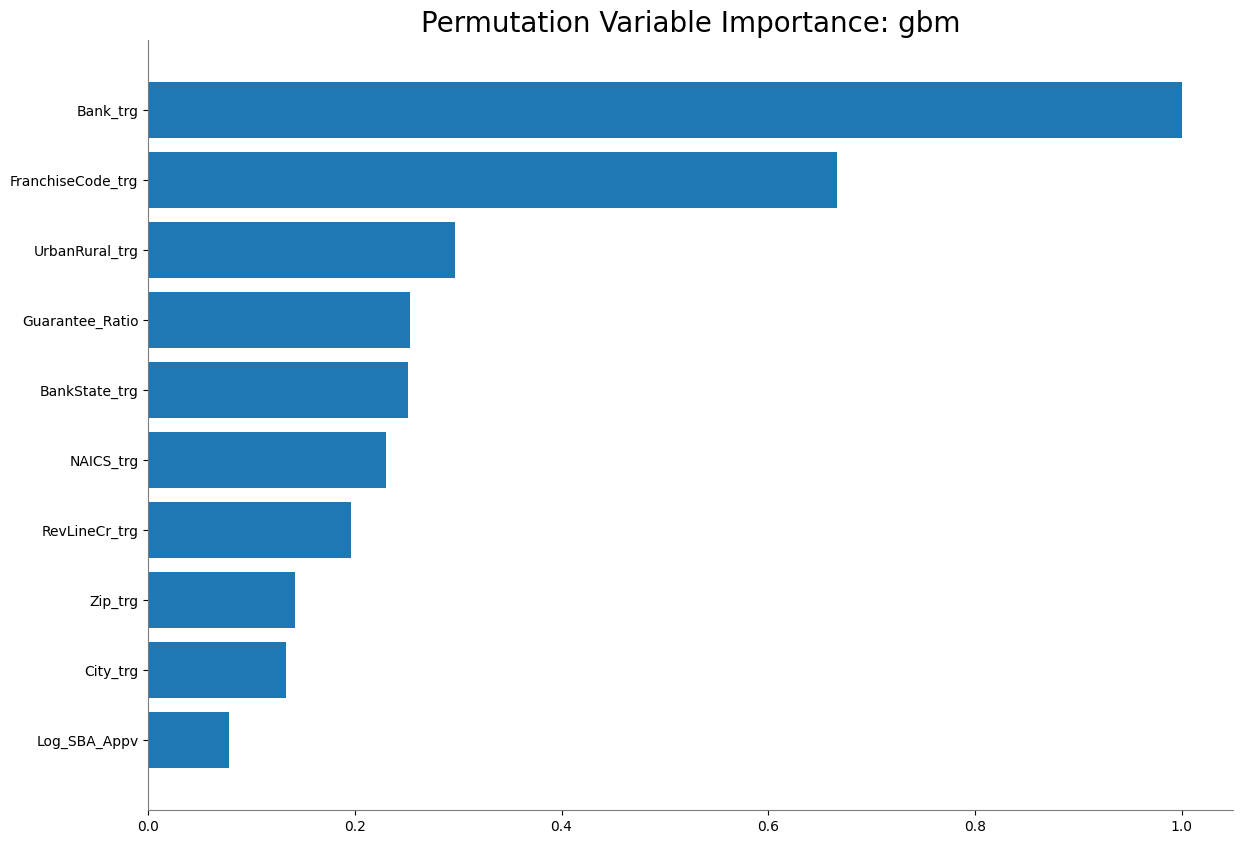

Variable,Relative Importance,Scaled Importance,Percentage
Bank_trg,0.0434499,1.0,0.2543979
FranchiseCode_trg,0.0289635,0.6665953,0.1695804
UrbanRural_trg,0.0128989,0.2968676,0.0755225
Guarantee_Ratio,0.0110210,0.2536478,0.0645275
BankState_trg,0.0109065,0.2510138,0.0638574
NAICS_trg,0.0099787,0.2296592,0.0584248
RevLineCr_trg,0.0085072,0.1957940,0.0498096
Zip_trg,0.0061702,0.1420068,0.0361262
City_trg,0.0058072,0.1336532,0.0340011
Log_SBA_Appv,0.0033806,0.0778049,0.0197934


In [77]:
# plot permutation importance (bar plot)
best_model.permutation_importance_plot(h2o_test)

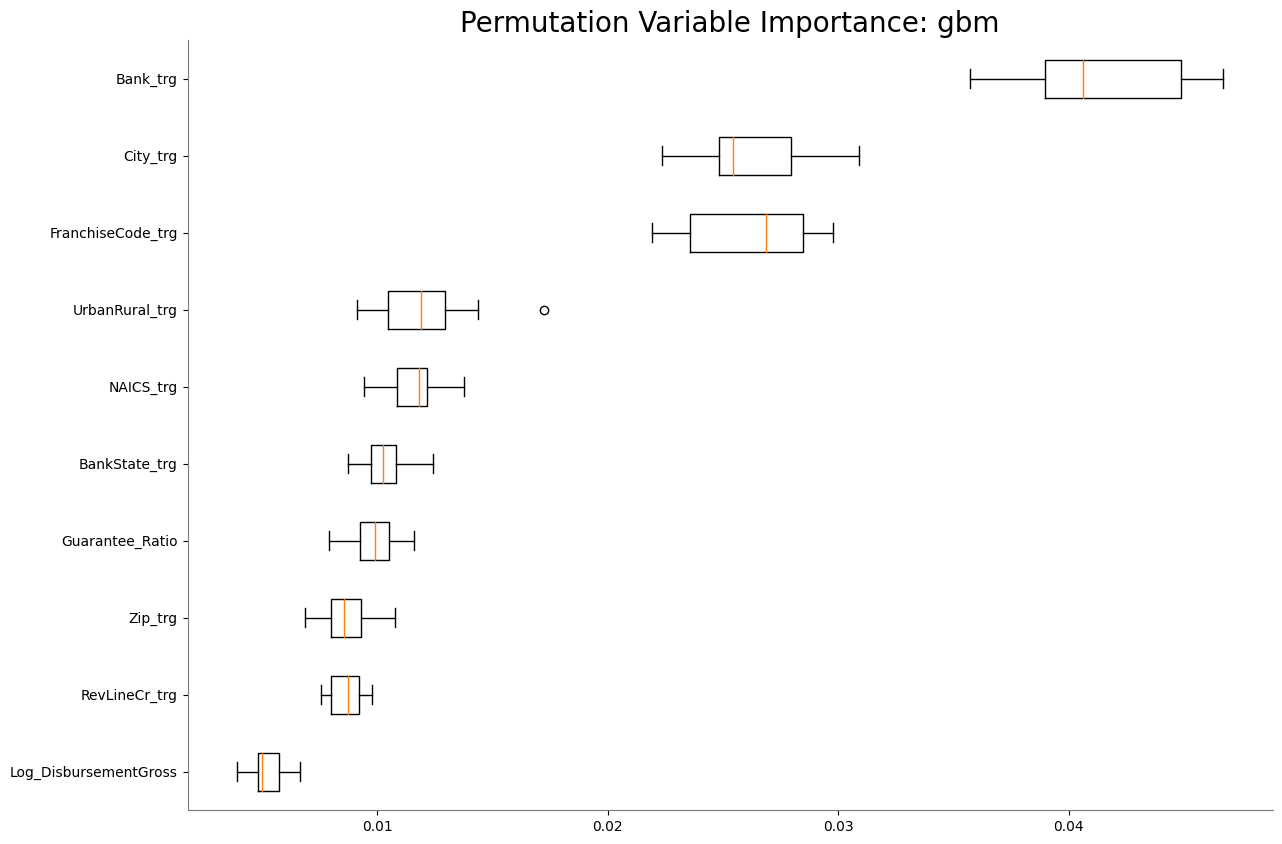

In [78]:
# plot permutation importance (box plot)
best_model.permutation_importance_plot(train, n_repeats=15);

In [ ]:
# load JS visualization code to notebook
import shap
shap.initjs()

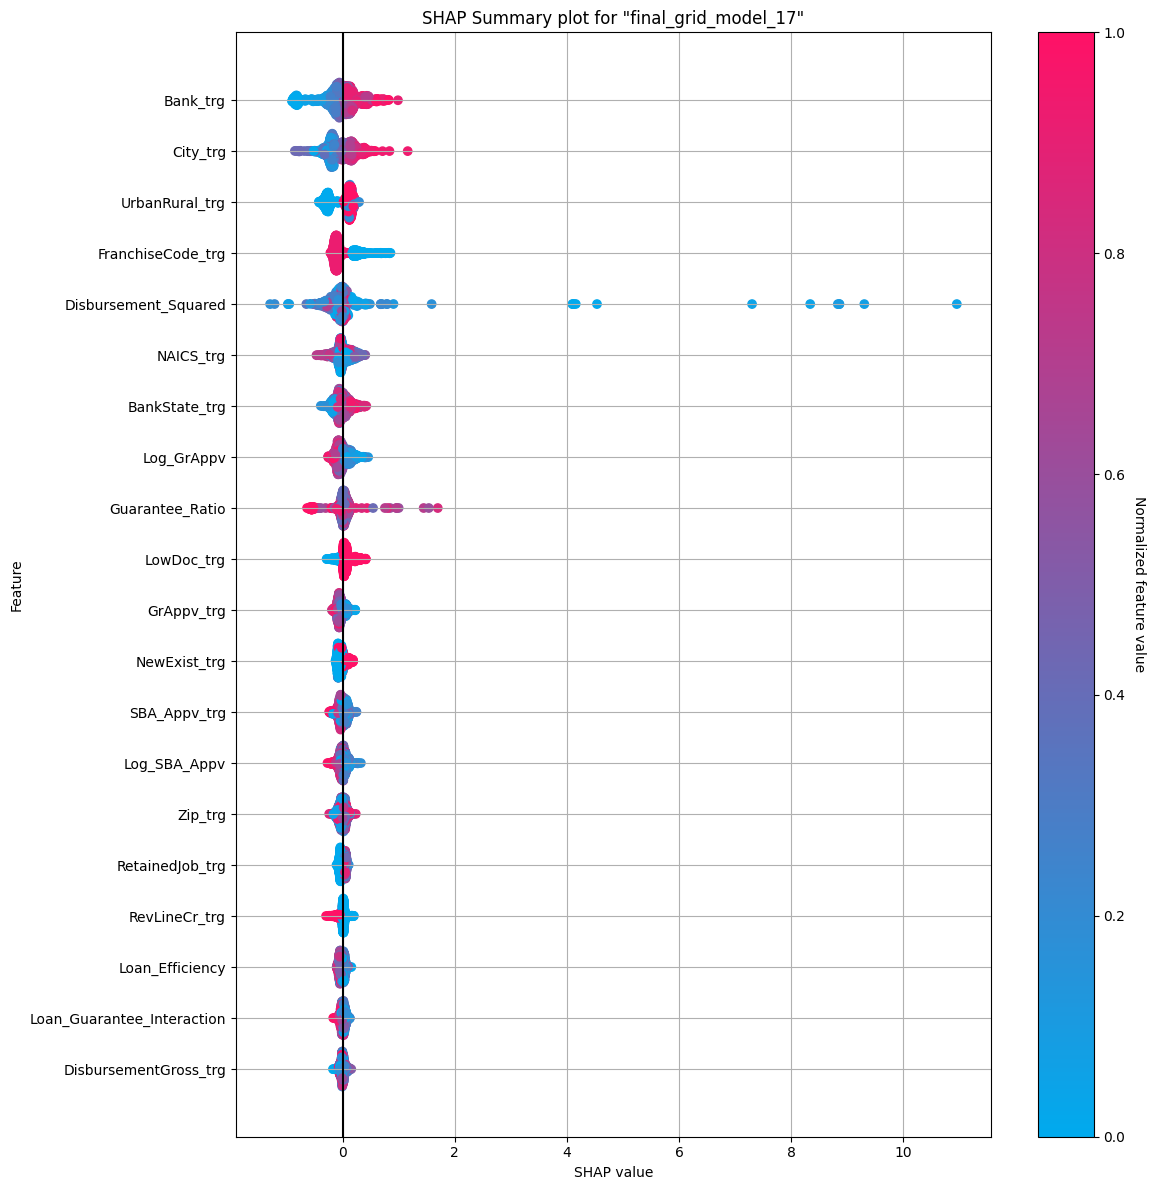

In [76]:
best_model.shap_summary_plot(h2o_test)

In [79]:
y_pred = best_model.predict(h2o_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [80]:
# Predictions on the test data
y_pred 

predict,p0,p1
0,0.945508,0.0544925
0,0.953863,0.0461369
0,0.940611,0.0593888
1,0.531923,0.468077
0,0.897713,0.102287
0,0.890037,0.109963
0,0.941651,0.0583494
1,0.59599,0.40401
0,0.958519,0.0414807
0,0.836096,0.163904


# Plotting Individual Shap plots for few correct and wrong predictions

In [ ]:
# Plot SHAP contributions for one instance where MIS_Status=0 and probability_0 =0.953
best_model.shap_explain_row_plot(h2o_test, row_index=1)

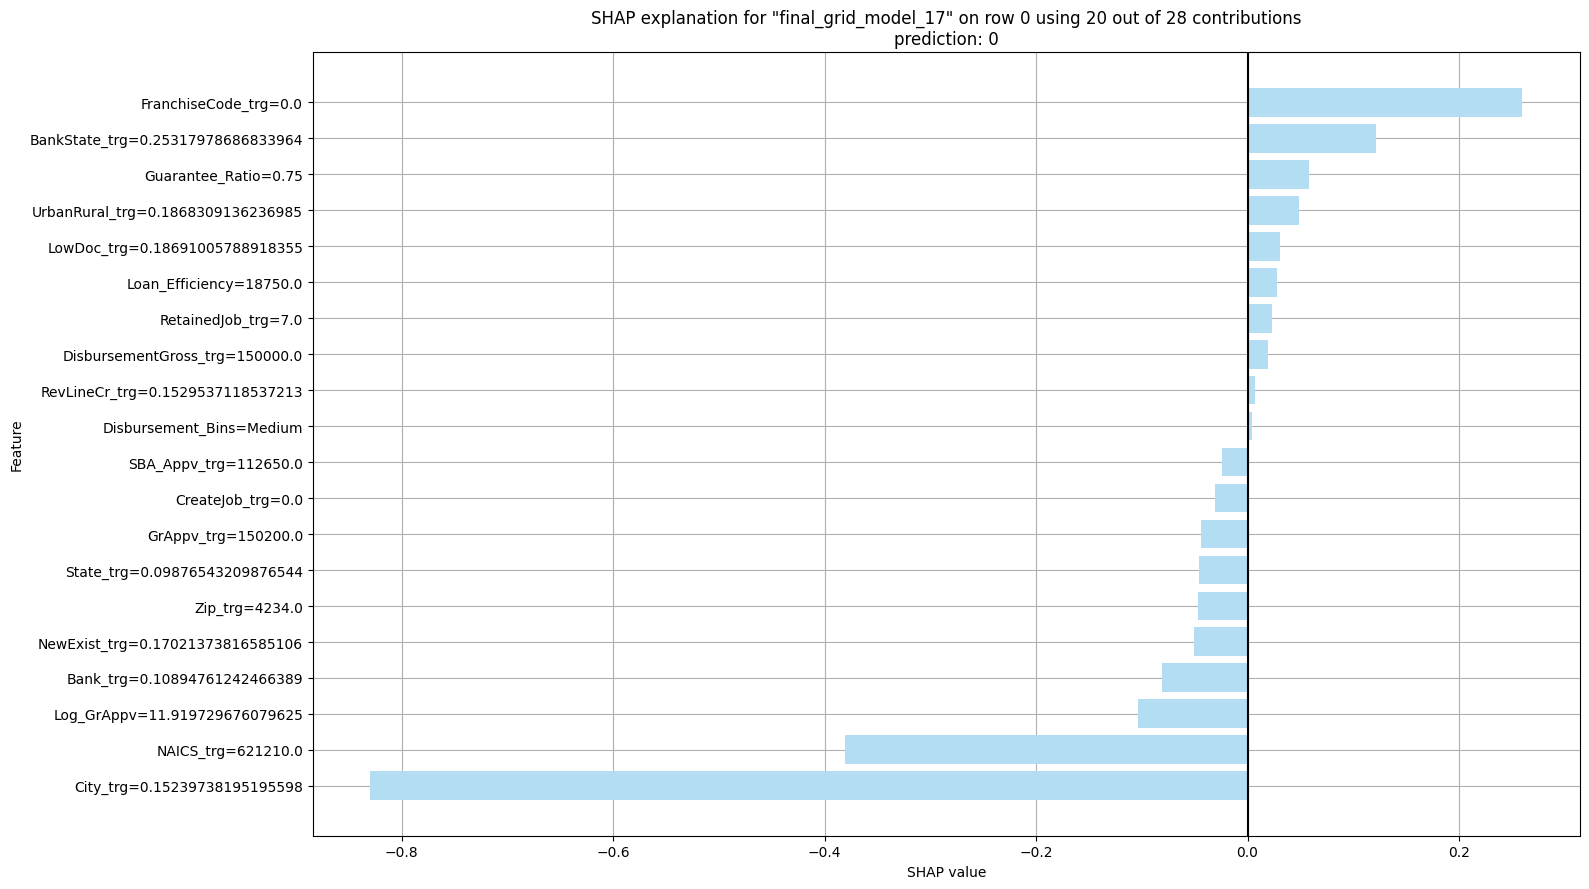

In [82]:
# Plot SHAP contributions for one instance where MIS_Status=0 and probability_0 =0.945
best_model.shap_explain_row_plot(h2o_test, row_index=0)

#From the above shap plot (instance where label 0 is correctly identified with 0.945 probability we can see that city  and NAICS are the features contributiong the most towards that predicted value of zero

 Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        1) Label `0` is correctly identifi
        2) Label `0` is identified as `1`
        3) Label `1` is correctly identified
        4) Label `1` is identified as `0`
         Significant probability means high probability of being correct/in-correct (depending on the scenario)

To plot all these we need to find the row_index in h2o_test where these instances are happening

One way to do it is by comparing MIS_Status and predict column in y_pred and checking for the most significant probabilities

In [83]:
test_yhat = h2o_test.cbind(y_pred) #adding probability p1 to teast dataset

In [84]:
test_yhat[['MIS_Status','predict','p0','p1']].head(2)

City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,MIS_Status,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared,p_paid_full
0.152397,0.0987654,4234,0.108948,0.25318,621210,7,0.170214,0,7,0,0.186831,0.152954,0.18691,150000,0,150200,112650,0,11.9184,2.07944,11.9197,11.632,0,Medium,18750,0.75,1.692e+10,2.25e+10,0.0544925
0.168266,0.185182,95660,0.0711297,0.218784,454110,18,0.170214,0,0,1,0.0714764,0.152954,0.18691,410000,0,410000,307500,0,12.9239,2.94444,12.9239,12.6362,0,High,410000,0.75,1.26075e+11,1.681e+11,0.0461369


In [ ]:
best_zeros_idx = [] #actual and predicted both are zero with high probability
worst_zeros_idx = [] #actual is zero , but predicted is one by a huge miss
best_ones_idx = [] #actual and predicted both are one with high probability
worst_ones_idx = [] #actual is one , but predicted is zero by a huge miss

In [ ]:
bestzeros= test_yhat[['MIS_Status'=='predict'==0]]
bestones= test_yhat[['MIS_Status'=='predict'==0]]
sorted_bestzeros = bestzeros.sort_values(by=['p0'], ascending=False)
sorted_bestones = bestones.sort_values(by=['p1'], ascending=False)
worstzeros= test_yhat[['MIS_Status'==0 and'predict'==1]]
worstones= test_yhat[['MIS_Status'== 1 and'predict'==0]]
sorted_worstzeros = worstzeros.sort_values(by=['p1'], ascending=False)
sorted_worstones = worstone.sort_values(by=['p0'], ascending=False)

In [ ]:
best_model.shap_explain_row_plot(h2o_test, row_index=0)
#after finding the row index for each type, plot the individual shap force plots

# Exporting the model

In [74]:
import joblib

# save the model
model_path = h2o.save_model(model=best_model , path="../artifacts", force=True)
model_path

'C:\\Users\\Lahari Reddy\\aml-spring-2024\\Projects\\Project 2\\SXK230101_Project 2\\artifacts\\final_grid_model_17'

# Exporting the arifacts

In [75]:
artifacts_dict = {
    "trg_encoders" : encoder,
    "trg_enc_columns": categorical_columns,
    "training_columns": predictors,
    "threshold": f1BestThreshold
}
artifacts_dict_file = open("../artifacts/artifacts_dict_file.pkl", "wb")
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
    
artifacts_dict_file.close() 

## Project Summary and Conclusion

SBA Dataset Columns Explanation for the dataset provided.

1. City : Borrower city<br>
2. State : Borrower state<br>
3. Zip : Borrower zip code<br>
4. Bank : Bank name<br>
5. BankState : Bank state<br>
6. NAICS : North American industry classification system code<br>
7. NoEmp : Number of business employees<br>
8. NewExist : 1 = Existing business, 2 = New business<br>
9. CreateJob : Number of jobs created<br>
10. RetainedJob : Number of jobs retained<br>
11. FranchiseCode : Franchise code, (00000 or 00001) = No franchise<br>
12. UrbanRural : 1 = Urban, 2 = rural, 0 = undefined<br>
13. RevLineCr : Revolving line of credit: Y = Yes, N = No<br>
14. LowDoc : LowDoc Loan Program: Y = Yes, N = No<br>
15. DisbursementGross : Amount disbursed<br>
16. BalanceGross : Gross amount outstanding<br>
17. GrAppv : Gross amount of loan approved by bank <br>
18. SBA_Appv : SBA’s guaranteed amount of approved loan<br>
19. MIS_Status : Loan status charged off = CHGOFF (0), Paid in full =PIF (1)<br>
    
- Summary of your work
1) Data cleanup - Columns "RevlineCr","LowDoc" and "NewExist" are cleaned such that they contain only valiud values
   Missing values in categorical columns are filled with mode and numerical columns are filled with zero's
   Zip column datatype is ensured to be object
2)categorical columns are target encoded- fitted on the training data and transformed on train and test data
3) Feature Engineering - Created 10 new features to be included in the model. The additional features added includes.
4) Once the dataset is finalised , train data is further split into train and validation data so that validation data can be used for model tuning.
5) A simple gbm model is trained without having any parameters to establish a baseline performance
6) This simple model had an AUC of 0.788 on the test data
7) As a next step, tuning was performed making sure there are atleast 50 combinations
8) Once the grid is fitted , best model is selected based on AUC
9) Best model performance on the test data is 0.817 which is improvement over base line model
10) The final best model has the following metrics:
Test AUCPR: 0.5398905821576048
Test Accuracy: 0.8519127802241794
Best F1 threshold: 0.26335606371340936
Test F1: 0.5322827612606865
Test AUC: 0.8274130100392025
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.263356063713
[[113862, 18037],[11287, 17786]]

The error rate for class 0 is 13.67 and class 1 is 40.35211) 063713409361.0/
11)Permutation feature importances are checked on the test data for the final model
Top few features are Bank_tCity_trg, UrbabRural_trg, FranchiseCode_trg and Disbursement Squaredr0298343
N

12) This suggests that from the features that were part of tbank, cityntee_Ratio,  , franchise code UrbanRural are most
13) tant. AI13)The confusion matrix suggests that the errors are more in predicting class 1 (almost 40% of the customers who actually paid in full are predicted otherwise) which can be further improvedyour recommendations

# Scoring function submitted as a separate .ipynb file

## Stop Here. Create new file/notebook

Don't include scoring function in the same notebook as your project. Create a new notebook or python file for scoring function.

Project 2 scoring function should include the following fields, same as in Project 1.

In [ ]:
project_2_scoring(X_test).head()